# Sensor Data Fusion

Lecturer: Prof. Baum \
Tutors: Kolja Thormann \
Semester: Winter 21/22

## Homework 1

The objective is to estimate the two-dimensional object location $x = [x_1,x_2]^T \in \mathbb{R}^2$ using (noise-corrupted) distance measurements $d^i \in \mathbb{R}$ to $N$ walls.

The location of the i-th wall is given in normal form

$$n^i_1 \cdot x^w_1 + n^i_2 \cdot x^w_2 = c^i$$

Assume $n^i$ points to the half space where the object is located. Given are four walls with corresponding measurements:

| $i$ | $n^i_1$ | $n^i_2$ | $c^i$ | distance $d^i$
|:------|------|------|------|------:|
| 1 | -5 | -1 | -45 | 4.7 |
| 2 | -1 | -8 | -70 | 5.2 |
| 3 | -1 | 9 | 5 | 5.5 |
| 4 | 8 | -1 | 7 | 4.5|

---
The following tasks will have missing sections marked that you should fill out. 

Missing code parts are marked by
```
# ... code code code
=== YOUR CODE HERE ===

=== END OF YOUR CODE ===
# ... code code code
```
If you are asked to implement a function, make sure to check what variable will be returned by the function and to fill it accordingly. Do not change code outside of the indicated sections.

Furthermore, some questions require theoretical answers instead of python code.

Such questions will have a field marked like this: 

=== YOUR ANSWER HERE === 

In [1]:
# import statements
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Definitions of variables 

# define the boundaries for the walls
walls = [(-5, -1, -45), 
         (-1, -8, -70), 
         (-1, 9, 5), 
         (8, -1, 7)]

# define the distance measurements to the walls
distances = [4.7, 5.2, 5.5, 4.5]

# define the colors to be used
colors = ['r','b','g','y']

# make sure everything is numpy
walls = np.array(walls)
distances = np.array(distances)

---
### a) 
Please write a function which visualizes walls and measurements using different colors.

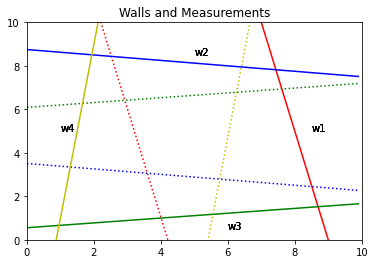

In [3]:
def visualize_walls(wall_coef, distances, colors):
    """
    Function that visualizes the walls and the respective measurements given a set of colors.
    :param wall_coef: Should be an nx3 matrix of the coefficients of the walls
    :param distances: Should be an nx1 vector of the measurements
    :param colors: Should be an nx1 vector of the colors to be used as strings
    """
    
    # === YOUR CODE HERE ===
    n_walls = len(wall_coef)
    
    for i in range(n_walls):  # iterate for each wall + measurement
        # select current coef., color and distance
        n1 = wall_coef[i][0]
        n2 = wall_coef[i][1]
        c = wall_coef[i][2]
        d = distances[i]
        
        # Calculate wall locations
        x1 = np.arange(0, 10, 0.1)  # x-Axis: evenly spaced across the axis
        x2 = np.array([(c-n1*x)/n2 for x in x1])  # y-Axis for walls
        d_x2 = (np.linalg.norm(np.array([n1, n2])) * d + c - n1*x1)/n2  # y-Axis for measurements
        
        # Visualize walls and measurements
        plt.plot(x1, x2, colors[i])  # Show walls in corresponding color
        plt.plot(x1,d_x2, colors[i]+":")  # Show measurements in corresponding color and with dotted lines
        
        # Manually add the numbers 1-4 to the walls to see which measurement is which
        plt.annotate("w1", (8.5, 5))
        plt.annotate("w2", (5, 8.5))
        plt.annotate("w3", (6, 0.5))
        plt.annotate("w4", (1, 5))
    # === END OF YOUR CODE ===
    
    plt.xlim((0, 10))
    plt.ylim((0, 10))
    plt.title("Walls and Measurements")
    plt.show()
    
    
visualize_walls(walls, distances, colors)

---
### b)
Formulate a linear measurement equation $y^i = \mathbf{H}^ix + e^i$, which relates the measurement to the $i$-th wall with $x$ and the error $e^i$. 

In the same manner, formulate a measurement equation that relates $N$ walls, i.e. the 1-st to $N$-th walls, with $x$ and $e$. Note that the $n^i$ vectors are not normalized.

===YOUR ANSWER HERE===


The distance $d^i$ to wall $i$:
$$
d^i=\frac{n_1^ix_1+n_2^ix_2-c^i}{\sqrt{(n_1^i)^2+(n_2^i)^2}}+e^i\\
d^i\sqrt{(n_1^i)^2+(n_2^i)^2}+c^i=n_1^ix_1+n_2^ix_2+e^i\\
\underbrace{d^i\sqrt{(n_1^i)^2+(n_2^i)^2}+c^i}_{y^i}=\underbrace{\begin{bmatrix}n_1 & n_2\end{bmatrix}}_{\textbf{H}^i}\underbrace{\begin{bmatrix}x_1\\x_2\end{bmatrix}}_{\vec{x}}+e^i
$$

Distances to $N$ Walls:

$$
\underbrace{\begin{bmatrix}d^1\sqrt{(n_1^1)^2+(n_2^1)^2}+c^1\\\vdots\\d^i\sqrt{(n_1^i)^2+(n_2^i)^2}+c^i\\\vdots\\d^N\sqrt{(n_1^N)^2+(n_2^N)^2}+c^N\end{bmatrix}}_{\vec{y}}=\underbrace{\begin{bmatrix}n_1^1 & n_2^1\\\vdots & \vdots\\n_1^i & n_2^i\\\vdots & \vdots\\n_1^N & n_2^N\end{bmatrix}}_{\textbf{H}}\underbrace{\begin{bmatrix}x_1\\x_2\end{bmatrix}}_{\vec{x}}+\underbrace{\begin{bmatrix}e^1\\\vdots\\e^i\\\vdots\\e^N\end{bmatrix}}_{\vec{e}}
$$

---
### c) 
Could you calculate the unique location for the first case in 1b), if not, please explain. If a unique location could be obtained, which requirements are needed?

===YOUR ANSWER HERE===

It is not possible to get an exact solution because we have 2 unknowns and only 1 formula. The exact solution can be calculated if $rank(\textbf{H})=2$.

---
### d)
Based on the measurement equation formulated in 1b), write a function which calculates the least squares solutions based on the measurements. Using the function you implemented, calculate the least squares solutions $\hat{x}_{12}$, $\hat{x}_{34}$ and $\hat{x}_{1234}$ based on the measurements $(y_1,y_2)$, $(y_3,y_4)$ as well as $(y_1,y_2,y_3,y_4)$.

In [4]:
def localization_ls(wall_coef, d):
    """
    Based on an nx3 matrix of wall coefficients together with an nx1 vector of distance measurements, this function 
    calculates the least square estimate.
    
    :param wall_coef: nx3 matrix of wall coefficients
    :param d: nx1 matrix of distance measurements
    :return: the least squares estimate
    """
    # Ensure that everything is numpy
    wall_coef = np.array(wall_coef)
    d = np.array(d)
    
    # === YOUR CODE HERE ===
    # Determine H from the wall coefficient
    H = wall_coef[:,0:2]
    
    # Init y (empty)
    nr_walls = wall_coef.shape[0]
    y = np.zeros(nr_walls)
    
    # Fill y wall-by-wall
    for i in range(nr_walls):
        n1 = wall_coef[i][0]
        n2 = wall_coef[i][1]
        c = wall_coef[i][2] 
        y[i] = d[i] * np.linalg.norm(np.array([n1, n2])) + c
    
    # Apply Least Squares
    # xLS = (HT*H)^-1*HT*y
    x_ls = (np.linalg.inv(np.dot(H.T, H)))
    x_ls = np.dot(x_ls, H.T)
    x_ls = np.dot(x_ls, y)
    
    # === END OF YOU CODE ===
    
    return x_ls

In [5]:
# Now, localization_ls will be used to calculate the measurements based on the first two, the last two, and all 4 walls
x_12 = localization_ls(walls[0:2, :], distances[0:2])
x_34 = localization_ls(walls[2:4, :], distances[2:4])
x_1234 = localization_ls(walls, distances)

print("Estimate using walls 1+2:",x_12[0],"|",x_12[1])
print("Estimate using walls 3+4:",x_34[0],"|",x_34[1])
print("Estimate using all walls:",x_1234[0],"|",x_1234[1])

Estimate using walls 1+2: 3.5948873482067634 | 3.0601715450800984
Estimate using walls 3+4: 6.258113479800663 | 6.7847479710618295
Estimate using all walls: 4.8807170682595284 | 4.86482284830198


---
### e) 
Given the true location $x$, implement a function which calculates the estimation error $e$ using Euclidean Norm, e.g.

$e_{12} = ||\hat{x}_{12}-x||$ 

$e_{34} = ||\hat{x}_{34}-x||$ 

$e_{1234} = ||\hat{x}_{1234}-x||$

Assuming the true location $x = [5, 5]^T$, calculate $e_{12}$,$e_{34}$ and $e_{1234}$. What can you observe?

In [6]:
def estimation_error(x, x_esti):
    """
    Given a true location and an estimation for the location, calculates the error of the measurement and returns it.
    :param x: True location as 2x1 vector
    :param x_esti: Estimated location as 2x1 vector
    :return: err, the estimation error as a scalar
    """
    # ensure everything is numpy
    x = np.array(x)
    x_esti = np.array(x_esti)
    
    # === YOUR CODE HERE ===
    
    err = np.linalg.norm(x-x_esti)
    
    # === END OF YOUR CODE ===
    
    return err

Now, the calculated location will be visualized, and the calculated errors will be printed out:

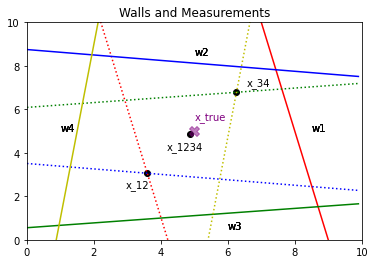

Error using walls 1+2: 2.3952611546022187
Error using walls 3+4: 2.183615087020936
Error using all walls: 0.1802811142238463


In [7]:
# Define true location x
x = np.array([5,5])

# Visualize the calculated locations
plt.scatter(x_12[0], x_12[1], c='k', marker="o")
plt.scatter(x_34[0], x_34[1], c='k', marker="o")
plt.scatter(x_1234[0], x_1234[1], c='k', marker="o")
plt.scatter(x[0], x[1], c='purple', marker="X", s=100, alpha=0.5)

# Add annotations for easier understanding (shifted so they can be read easier)
plt.annotate("x_12", x_12-0.65) 
plt.annotate("x_34", x_34+0.3)
plt.annotate("x_1234", x_1234-0.7)
plt.annotate("x_true", x+[0, 0.5], c="purple")

# Add the walls, which also shows the plot
visualize_walls(walls, distances, colors)

# Print errors
e_12 = estimation_error(x,x_12)
e_34 = estimation_error(x,x_34)
e_1234 = estimation_error(x,x_1234)

print("Error using walls 1+2:",e_12)
print("Error using walls 3+4:",e_34)
print("Error using all walls:",e_1234)

What can you observe?

=== YOUR ANSWER HERE ===

Incorporating more measurement improves the result.